In [1]:
import os
import pickle
import numpy as np

In [3]:
#load log資料夾中的一個pickle檔

with open("../log/n3 (1).pickle", "rb") as file:
    data = pickle.load(file)
print(data)

{'record_format_version': 2, 'ml': {'scene_info': [{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (100, 388), 'platform': (70, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50

In [6]:
#針對資料結構進行整理
game_info = data['ml']['scene_info']
game_command = data['ml']['command']
print(game_info)
print(game_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50), (25, 60), (150, 60), (35, 70), (135, 70), (25, 80), (150, 80), (35, 90), (60, 90), (85, 90), (110, 90), (135, 90)]}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (100, 388), 'platform': (70, 400), 'bricks': [(50, 60), (75, 60), (100, 60), (125, 60), (60, 70), (85, 70), (110, 70), (50, 80), (75, 80), (100, 80), (125, 80)], 'hard_bric

In [7]:
#找特徵
g = game_info[1]

feature = np.array([g['ball'][0], g['ball'][1], g['platform'][0]])
print(feature)

print(game_command[1])
game_command[1] = 0

[ 93 395  75]
MOVE_LEFT


In [8]:
#取feature
for i in range(2, len(game_info) - 1):
    g = game_info[i]
    feature = np.vstack((feature, [g['ball'][0], g['ball'][1], g['platform'][0]]))
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2
    
answer = np.array(game_command[1:-1])

print(feature)
print(feature.shape)
print(answer)    # command
print(answer.shape)

[[ 93 395  75]
 [100 388  70]
 [107 381  65]
 ...
 [181  94  85]
 [174  87  80]
 [167  80  75]]
(3168, 3)
[0 1 2 ... 1 1 1]
(3168,)


# Kmeans

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(feature)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

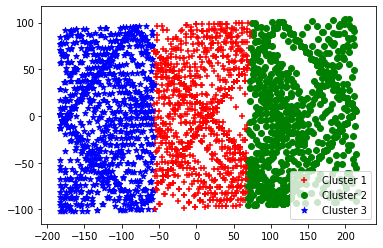

In [11]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(feature)
pca_2d = pca.transform(feature)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [12]:
print(answer,"\n")
print(kmeans.labels_)

[0 1 2 ... 1 1 1] 

[2 2 2 ... 1 1 1]


# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = np.array(feature)
y = np.array(answer)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=9)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
predict_label = clf.predict(x_test)

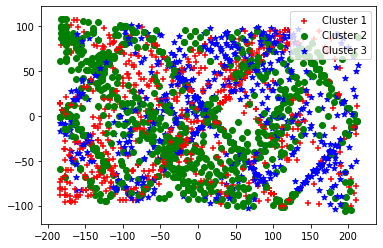

In [14]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(x_test)
pca_2d = pca.transform(x_test)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if predict_label[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif predict_label[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif predict_label[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

# Actual Label

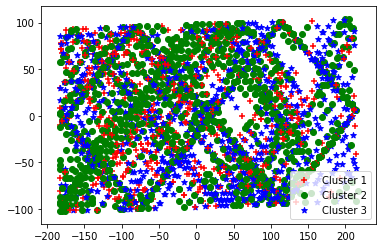

In [15]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(feature)
pca_2d = pca.transform(feature)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if answer[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif answer[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif answer[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
#資料劃分
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
#參數區間
param_grid = {'n_neighbors':[1, 2, 3]}
#交叉驗證 
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

# #儲存
# file = open('arkanoid_e3_20210309_knn_model.pickle', 'wb')
# pickle.dump(grid, file)
# file.close()

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    4.3s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    4.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.6s finished


In [17]:
#最佳參數
print(grid.best_params_)
#預測結果
#print(grid_predictions)
#混淆矩陣
print(confusion_matrix(y_test, grid_predictions))
#分類結果
print(classification_report(y_test, grid_predictions))

{'n_neighbors': 3}
[[116  75  63]
 [ 91 190  79]
 [122  66 149]]
              precision    recall  f1-score   support

           0       0.35      0.46      0.40       254
           1       0.57      0.53      0.55       360
           2       0.51      0.44      0.47       337

    accuracy                           0.48       951
   macro avg       0.48      0.48      0.47       951
weighted avg       0.49      0.48      0.48       951

